In [39]:
import os
import time, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

` rsync -avu nexusgateway:/mnt/NexusData/Bridge/Temperature_20220419.txt ./`

In [2]:
date  = "20220419"

fname = "Temperature_" + date + ".txt"
fpath = "/home/nexus-admin/Downloads"
path  = os.path.join(fpath,fname)

In [3]:
## Extract the header column names
col_names = None
with open(path,"r") as f:
    col_names = f.readline().split()
print(col_names)

['Channel', 'Measurement', 'Resistance', 'Temperature', 'Res', 'Range', 'Excitation', 'Time', 'ControlSetup', 'ControlChannel', 'CurveName', 'HeaterRange', 'PID_P', 'PID_I', 'PID_D', 'SetupUnit', 'SetPoint', 'HeatResistance', 'HeaterPower']


In [4]:
## Create an empty dataframe with column names
df = pd.DataFrame(columns=col_names)

In [5]:
with open(path,"r") as f:
    ## Get all the lines in the files
    lines = f.readlines()
    
    ## Count the number of lines in the file 
    nline = len(lines)
    
    ## Loop over all rows in file, skipping the first
    for i in 1+np.arange(nline-1):
        
        ## Parse the line
        line = None
        line = np.array(lines[i].split("\t"))
        l1t  = np.append(line[0:4] , line[4].split())
        line = np.append( l1t, line[5:])
        line[3] = line[3].replace("K","")
        
        ## Add row to end of DataFrame
        df.loc[len(df.index)] = line

In [6]:
def timeConvert(tstr):
    return time.mktime(datetime.datetime.strptime(tstr, "%Y-%m-%d %H:%M:%S.%f").timetuple())
    
df["Tstamp"] = df["Time"].apply(timeConvert)

In [37]:
df

,Channel,Measurement,Resistance,Temperature,Res,Range,Excitation,Time,ControlSetup,ControlChannel,CurveName,HeaterRange,PID_P,PID_I,PID_D,SetupUnit,SetPoint,HeatResistance,HeaterPower,Tstamp
0,2,Lower MC,1934.19 Ohms,0.303308,6.32,kOhms,20.0 uV,2022-04-19 15:09:57.937,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,N/A\n,1.650399e+09
1,3,SQUID plate,1991.56 Ohms,0.215558,6.32,kOhms,20.0 uV,2022-04-19 15:10:07.671,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650399e+09
2,2,Lower MC,1924.87 Ohms,0.314005,6.32,kOhms,20.0 uV,2022-04-19 15:10:17.583,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650399e+09
3,3,SQUID plate,1992.78 Ohms,0.214814,6.32,kOhms,20.0 uV,2022-04-19 15:10:27.319,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650399e+09
4,2,Lower MC,1917.6 Ohms,0.323054,6.32,kOhms,20.0 uV,2022-04-19 15:10:37.233,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650399e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3348,16,,40610.8 Ohms,N/A,6.32,kOhms,63.2 uV,2022-04-20 00:11:04.131,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650431e+09
3349,16,,40591.7 Ohms,N/A,6.32,kOhms,63.2 uV,2022-04-20 00:11:08.876,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650431e+09
3350,16,,40617.3 Ohms,N/A,6.32,kOhms,63.2 uV,2022-04-20 00:11:13.725,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650431e+09
3351,16,,40602.4 Ohms,N/A,6.32,kOhms,63.2 uV,2022-04-20 00:11:18.517,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650431e+09


In [8]:
df[ df["Channel"] == "2" ]

,Channel,Measurement,Resistance,Temperature,Res,Range,Excitation,Time,ControlSetup,ControlChannel,CurveName,HeaterRange,PID_P,PID_I,PID_D,SetupUnit,SetPoint,HeatResistance,HeaterPower,Tstamp
0,2,Lower MC,1934.19 Ohms,0.303308,6.32,kOhms,20.0 uV,2022-04-19 15:09:57.937,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,N/A\n,1.650399e+09
2,2,Lower MC,1924.87 Ohms,0.314005,6.32,kOhms,20.0 uV,2022-04-19 15:10:17.583,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650399e+09
4,2,Lower MC,1917.6 Ohms,0.323054,6.32,kOhms,20.0 uV,2022-04-19 15:10:37.233,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650399e+09
6,2,Lower MC,1924.13 Ohms,0.314926,6.32,kOhms,20.0 uV,2022-04-19 15:10:56.892,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650399e+09
8,2,Lower MC,1921.04 Ohms,0.318773,6.32,kOhms,20.0 uV,2022-04-19 15:11:16.534,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650399e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,2,Lower MC,3476.12 Ohms,0.010121,6.32,kOhms,6.32 uV,2022-04-20 00:01:59.796,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650431e+09
3251,2,Lower MC,3465.93 Ohms,0.010556,6.32,kOhms,6.32 uV,2022-04-20 00:02:29.260,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650431e+09
3254,2,Lower MC,3468.41 Ohms,0.010450,6.32,kOhms,6.32 uV,2022-04-20 00:02:58.713,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650431e+09
3257,2,Lower MC,3466.41 Ohms,0.010535,6.32,kOhms,6.32 uV,2022-04-20 00:03:28.235,Off,13,None,Off,0.001,2.0,1.0,Kelvin,50.0,8000,0.000e+00\n,1.650431e+09


In [54]:
def plotChannel(chan, fig_obj=None):
    
    ## Ensure we're looking at strings only
    if not (type(chan)==type("s")):
        chan = str(chan)
        
    ## Get the dataframe entries for this channel
    chan_df = df[ df["Channel"] == chan ]
    
    ## Get the data to plot
    t_vals = chan_df["Tstamp"].to_numpy().astype(type(1.1))      ## Epoch seconds
    T_vals = chan_df["Temperature"].to_numpy()                   ## Kelvin
    
    ## Clean and recast the data of interest
    T_vals[ T_vals == 'Out of Range' ] = np.nan
    T_vals    = 1000.0 * T_vals.astype(type(1.1))                ## milliKelvin
    t_vals_dt = np.vectorize(datetime.datetime.fromtimestamp)(t_vals-5*3600)
    
    ## Create the plot
    if fig_obj is None:
        fig = plt.figure()
    ax0 = fig_obj.gca()
    ax0.set_xlabel("Time")
    ax0.set_ylabel("Temperature [mK]")
    
    ## Draw the line
    ax0.plot(t_vals_dt,T_vals)
    
    ## Change the time format
    ax0.xaxis.set_major_formatter( DateFormatter('%H:%M:%S') )
    for tick in ax0.xaxis.get_majorticklabels():
        tick.set_horizontalalignment('right')
        tick.set_rotation(30)

    return fig_obj, ax0

<IPython.core.display.Javascript object>


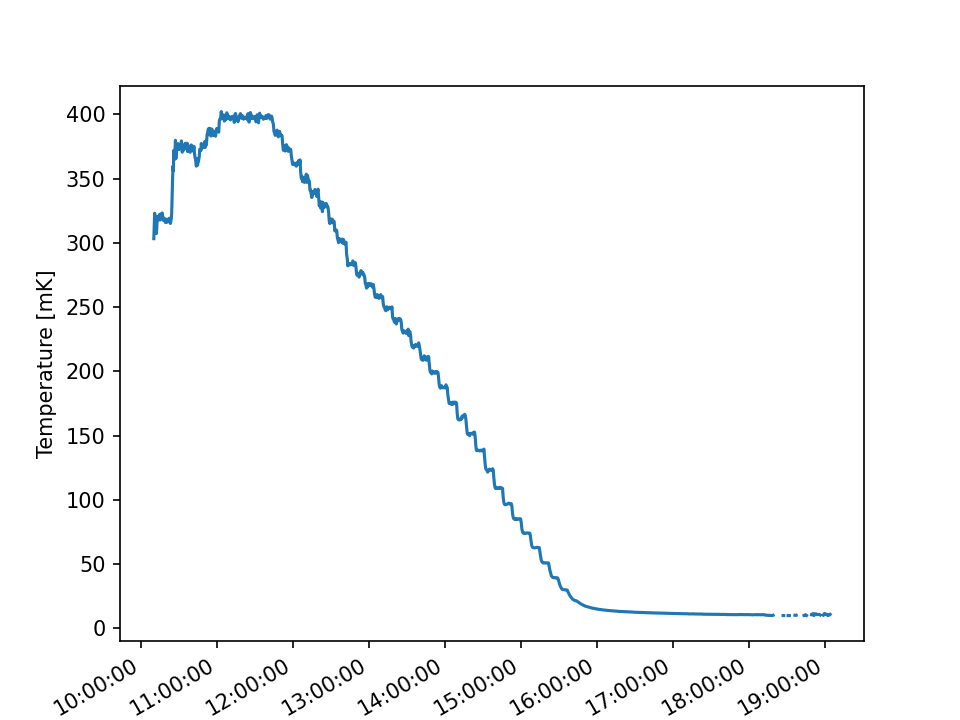

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Time', ylabel='Temperature [mK]'>)

In [56]:
%matplotlib notebook
fig = plt.figure()
plotChannel(2,fig_obj=fig)
# plotChannel(3,fig_obj=fig)
# plt.legend(["Lower MC Plate","SQUID Plate"])